# brmspy - google colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1uq6S3exG1zy-JX1lD69ehG4ZHOu9eXY6)

In [1]:
try: from brmspy import brms
except ImportError:
    %pip install -q brmspy
    from brmspy import brms

[brmspy][WARNING] brmspy: brms and other required libraries are not installed. Please call brmspy.install_brms()


In [3]:
brms.install_brms(use_prebuilt=True)

R callback write-console: CmdStan path set to: /Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0/cmdstan
  


In [ ]:
epilepsy = brms.get_brms_data("epilepsy")
formula = "count ~ zAge + zBase * Trt + (1|patient)"
family = "poisson"
brms.default_prior(formula, data=epilepsy, family=family)

,prior,class,coef,group,resp,dpar,nlpar,lb,ub,tag,source
1,,b,,,,,,,,,default
2,,b,Base,,,,,,,,default
3,,b,count,,,,,,,,default
4,,b,obs10,,,,,,,,default
5,,b,obs100,,,,,,,,default
...,...,...,...,...,...,...,...,...,...,...,...
299,,b,visit3,,,,,,,,default
300,,b,visit4,,,,,,,,default
301,,b,zAge,,,,,,,,default
302,,b,zBase,,,,,,,,default


In [6]:

model = brms.fit(
    formula=formula,
    data=epilepsy,
    family=family,
    warmup=500,
    iter=1000,
    chains=4
)
idata = model.idata

[brmspy][<cell line: 0>] Fitting model with brms (backend: cmdstanr)...



Running MCMC with 4 sequential chains...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 2.8 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling)

In [7]:
brms.save_rds(model, "epilepsy_fixed_effects.rds")
# load later using: model = brms.load_rds_fit("epilepsy_fixed_effects.rds")

In [8]:
import arviz as az
summary = az.summary(
    idata,
    hdi_prob=0.95,
    kind="stats",
    round_to=3
)

print("Posterior Summary")
print("="*60)
print(summary)

Posterior Summary
                         mean     sd  hdi_2.5%  hdi_97.5%
Intercept               1.631  0.085     1.473      1.808
b_Intercept             1.777  0.130     1.535      2.049
b_Trt1                 -0.279  0.178    -0.630      0.079
b_zAge                  0.099  0.090    -0.067      0.286
b_zBase                 0.706  0.122     0.492      0.968
...                       ...    ...       ...        ...
r_patient[6,Intercept]  0.011  0.230    -0.424      0.440
r_patient[7,Intercept] -0.200  0.288    -0.712      0.425
r_patient[8,Intercept]  0.581  0.254     0.119      1.105
r_patient[9,Intercept] -0.013  0.261    -0.521      0.508
sd_patient__Intercept   0.588  0.072     0.458      0.731

[68 rows x 4 columns]


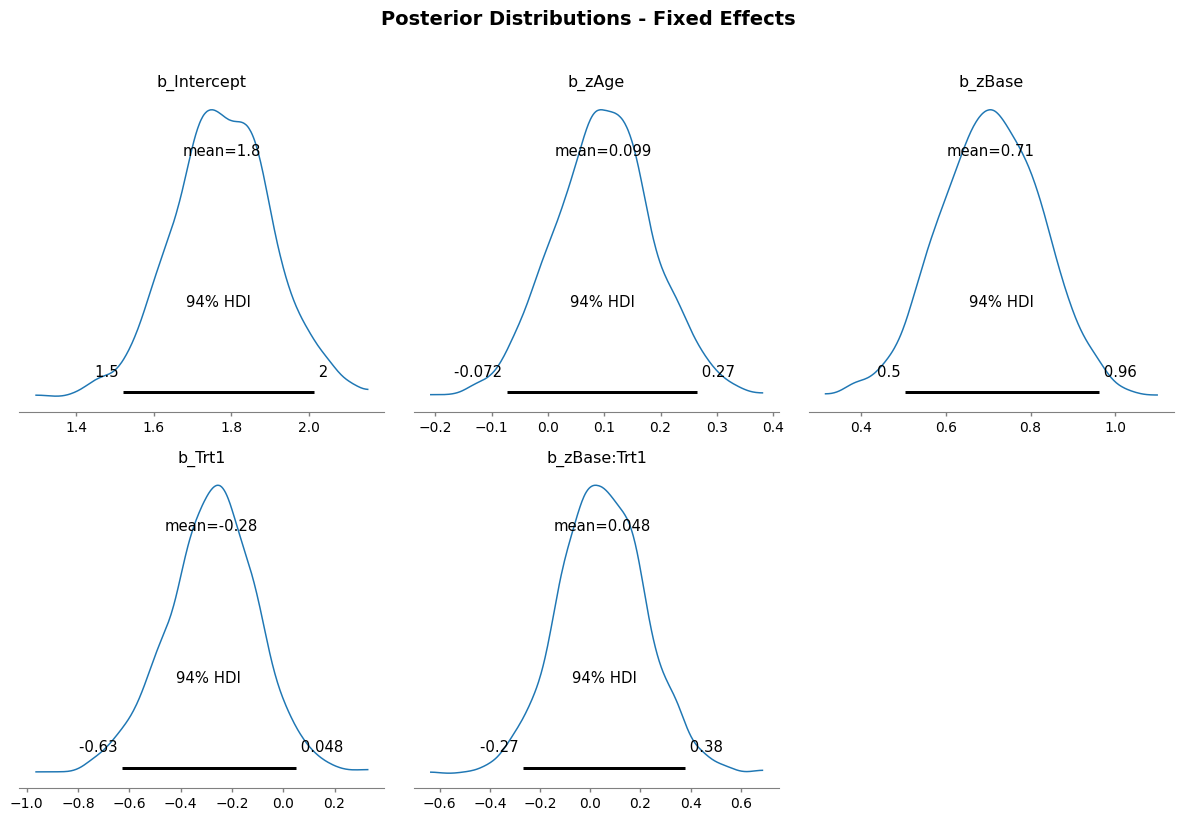

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = az.plot_posterior(
    idata,
    var_names=['b_Intercept', 'b_zAge', 'b_zBase', 'b_Trt1', 'b_zBase:Trt1'],
    figsize=(12, 8),
    textsize=10
)
plt.suptitle('Posterior Distributions - Fixed Effects', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
